In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [23]:
def geno_to_pheno(individuals):
  return [int("".join(map(str, individual)), 2) for individual in individuals]

def pheno_to_geno(x_values):
  return [[int(bit) for bit in format(x_value, '06b')] for x_value in x_values]

GENOTYPE_LENGTH = 6

def initialize_population(population_size: int) -> list[list]:
  """
  Creates the individuals for the population, each having six binary genes. Provides outputs
  e.g., as a list of lists e.g.,
  """
  return_list = []
  for _ in range(population_size):
    individual_list = []
    for _ in range(GENOTYPE_LENGTH):
      individual_list.append(random.choice([1,0]))
    return_list.append(individual_list)
  
  return return_list

def calculate_fitness(individuals, pheno_mode=False):
  """
  Takes in the phenotype and calculates the fitness
  
  fitness = − 0.00008333y^6 − 0.001y^5 + 0.09375y^4 + 1.16667y^3 − 19.53125y^2 − 234.375^y + 8350
  """
  if pheno_mode: # makes it so that individual phenos can be directly put into the function
     pheno = individuals
  else:
    pheno = geno_to_pheno(individuals)
  
  fitness_list = []
  
  for y in pheno:
    if y >= 32:
      y -= 64
    fitness_list.append(-0.00008333*(y**6) - 0.001*(y**5) + 0.09375*(y**4) + 1.16667*(y**3) - 19.53125*(y**2) - 234.375*y + 8350)
  
  return fitness_list

def parent_selection(individuals, fitness_values):
    """
    Inputs: Individuals, Fitness values; 
    Output: Parents (in random order, same number as individuals)). 
    This separate function parent selection should perform fitness-proportional parent
    selection (as discussed in class) so that more fit parents have a higher
    probability to be selected.
    """
    amount = len(individuals)

    #TODO: this might be a flawed way of calculating the probabilities
    total_fitness = sum(fitness_values)
    fitness_probabilities = [fitness/total_fitness for fitness in fitness_values]
    individual_indices = range(0,amount)

    parent_pool = []
    while(len(parent_pool) < amount-1):
      couple = np.random.choice(individual_indices, size=2, replace=False, p=fitness_probabilities)
      for parent_index in couple:
        parent_pool.append(individuals[parent_index])
    
    return parent_pool

def one_point_crossover(parents, crossover_probability):
    """
    Inputs: Parents, Crossover Probability 
    Outputs: Offspring (pre-Mutation)). 
    This separate function one point crossover performs 1-point crossover and generates 
    for parents 1 & 2, parents 3 & 4 etc. offspring (and e.g., provides all offspring as 
    a list of lists). Keep in mind that you can use a random uniform number ∈ [0, 1] 
    and compare it against the crossover probability, if it does not exceed it, crossover 
    is performed (with a random cutoff point, using randint function in random module), 
    otherwise, the two parents are simply copied to be the offspring.
    """
    amount_of_parents = len(parents)

    children_list = []

    for index in range(1,amount_of_parents,2):
      parent1 = parents[index - 1]
      parent2 = parents[index]

      should_crossover =  random.uniform(0, 1) <= crossover_probability

      if should_crossover:
        crossover_point = random.randint(1, len(parent1))
        
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
        
      else:
        offspring1 = parent1.copy()
        offspring2 = parent2.copy()
          

      children_list.append(offspring1)
      children_list.append(offspring2)

    return children_list

def mutation(individuals,mutation_probability):
    """
    Inputs: Individuals, Mutation Probability PM
    Outputs: Offspring (mutated)). 
    This separate function mutation performs bitflip mutation for 
    each bit / gene and each individual with mutation probability 
    PM . Similarly to crossover, keep in mind that you can use a 
    random uniform number ∈ [0, 1] and compare it against the mutation
    probability, if it does not exceed it, the value for the gene is
    flipped (e.g., from 0 to 1 or vice versa).
    """
    mutated_individuals = []

    for individual in individuals:
        mutated_individual = individual.copy()

        for gene_index in range(len(mutated_individual)):
            if random.random() <= mutation_probability:
                mutated_individual[gene_index] = 1 - mutated_individual[gene_index]

        mutated_individuals.append(mutated_individual)

    return mutated_individuals

def survivor_selection(individuals, offspring, fitness_individuals, fitness_offspring):
    """
    Inputs: Individuals, Offspring, Fitness Individuals, Fitness Offspring; 
    Outputs: (New) population. 
    This separate function survivor selection performs deterministic 
    survivor selection (no randomness / stochasticity here) by taking 
    from among the population individuals and the offspring the survivors 
    based on the highest fitness values (population size should remain the same!.
    """
    survivors = []
    population_copy = individuals.copy()
    offspring_copy = offspring.copy()
    fitness_population_copy = fitness_individuals.copy()
    fitness_offspring_copy = fitness_offspring.copy()

    while len(survivors) < len(individuals):
      individual_1 = [fitness_population_copy.index(max(fitness_population_copy)), max(fitness_population_copy)]
      individual_2 = [fitness_offspring_copy.index(max(fitness_offspring_copy)), max(fitness_offspring_copy)]
      if individual_1[1] > individual_2[1]:
          survivors.append(population_copy[individual_1[0]])
          population_copy.pop(individual_1[0])
          fitness_population_copy.pop(individual_1[0])
      else:
          survivors.append(offspring_copy[individual_2[0]])
          offspring_copy.pop(individual_2[0])
          fitness_offspring_copy.pop(individual_2[0])
      
    return survivors
          

def loop(no_of_iterations, population_size = 10, crossover_probability = 1, mutation_probability = 1):
    """
    Now create the complete version of the simple genetic algorithm
    (SGA), using the functions previously coded. Specifically, initialize the
    population and then loop (for a number of iterations to be specified) over
    those steps that should be repeated in the SGA.
    """
    population = initialize_population(population_size)
    fitness_population = calculate_fitness(population)
    history = []
    history.append(population.copy())

    for i in range(no_of_iterations):
       fitness_population = calculate_fitness(population)
       parents = parent_selection(population, fitness_population)
       offspring = one_point_crossover(parents, crossover_probability)
       offspring = mutation(offspring, mutation_probability)
       fitness_offspring = calculate_fitness(offspring)
       population = survivor_selection(population, offspring, fitness_population, fitness_offspring)
       history.append(population.copy())

    return population, history

# Task 1:

## 1.1 Initialization function

Here are the generated individuals.

In [24]:
SIZE = 4

task_1_population = initialize_population(SIZE)

print("The return type is a list of lists.")

for individual_no in range(SIZE):
  print(f"Individual {individual_no}: {task_1_population[individual_no]}")

The return type is a list of lists.
Individual 0: [0, 1, 1, 0, 1, 1]
Individual 1: [0, 0, 1, 0, 1, 1]
Individual 2: [0, 1, 1, 0, 1, 0]
Individual 3: [1, 0, 0, 1, 1, 1]


## 1.2 Calculate fitness

Here is the fitness for the individual: [0,1,0,1,0,1]

In [25]:
print(calculate_fitness([[0,1,0,1,0,1]]))

[12620.976507070001]


Here is the plotted fitness landscape:

[8350.0, 8097.35308667, 7813.92102688, 7509.88384243, 7197.30156032, 6889.84421875, 6602.46187552, 6350.99461883, 6151.72258048, 6020.85595147, 5973.965, 6025.35009187, 6187.351713280001, 6469.60049603, 6878.20724512, 7414.89296875, 8076.058910719999, 8851.79658523, 9724.837814080001, 10669.44476627, 11650.240000000002, 12620.976507070001, 13523.247759679998, 14285.13775963, 14819.811089920004, 15024.04296875, 14776.689305920001, 13937.09676163, 12343.452807679998, 9811.075791069994, 6130.644999999997, 1066.3707322699993, 4.083246079993842, 3343.3907922699946, 5792.9649999999965, 7519.294531069998, 8667.709127679998, 9364.029541629996, 9716.157465919998, 9815.60546875, 9738.966929919998, 9549.325979629999, 9297.60743968, 9023.86676707, 8758.52, 8523.513706270001, 8333.43493408, 8196.56116523, 8115.85027072, 8089.870468749999, 8113.67028512, 8179.58851603, 8278.00419328, 8398.02655187, 8528.125, 8656.69909147, 8772.58850048, 8865.52299883, 8926.51243552, 8948.17671875, 8925.01580032, 88

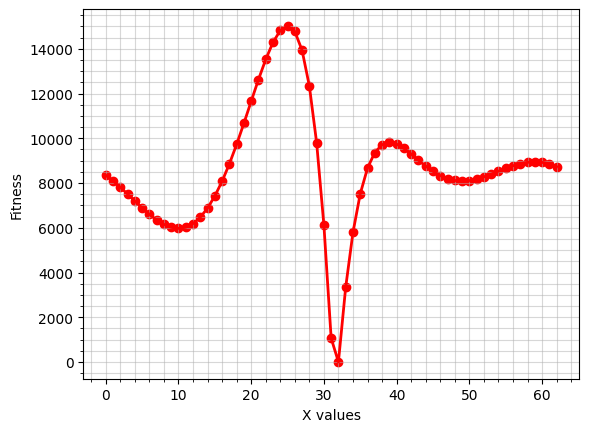

In [26]:
x_list = range(0,63)
y_list = calculate_fitness(x_list,pheno_mode=True)

print(y_list)

plt.plot(x_list, y_list, "r-", linewidth=2, label="Fitness")
plt.scatter(x_list, y_list, color="red")
plt.xlabel("X values")
plt.ylabel("Fitness")
plt.grid(True, alpha=0.5, which="both")
plt.minorticks_on()
plt.show()

The minimum is reached at x-value 32. The maximum is reached at 25.

## 1.3 Parent Selection Function


In [27]:
MAXIMA = [0,1,1,0,0,1] # 25
MINIMA = [1,0,0,0,0,0] # 32
MODERATE1 = [0,0,0,0,1,0] # 2
MODERATE2 = [1,0,1,0,0,0] # 40
task_3_population = [MAXIMA,MINIMA,MODERATE1,MODERATE2]
task_3_population_fitness = calculate_fitness(task_3_population)
print("Individuals:")
for individual_index in range(4):
    print(
        f"  Individual {individual_index}:\n        Geno: {task_3_population[individual_index]}\n        Fitness: {task_3_population_fitness[individual_index]}"
    )
task_3_parents = parent_selection(task_3_population, task_3_population_fitness)
task_3_parents_fitness = calculate_fitness(task_3_parents)

print("\nParents selected:")
for individual_index in range(4):
    print(
        f"  Parent {individual_index}:\n        Geno: {task_3_parents[individual_index]}\n        Fitness: {task_3_parents_fitness[individual_index]}"
    )

Individuals:
  Individual 0:
        Geno: [0, 1, 1, 0, 0, 1]
        Fitness: 15024.04296875
  Individual 1:
        Geno: [1, 0, 0, 0, 0, 0]
        Fitness: 4.083246079993842
  Individual 2:
        Geno: [0, 0, 0, 0, 1, 0]
        Fitness: 7813.92102688
  Individual 3:
        Geno: [1, 0, 1, 0, 0, 0]
        Fitness: 9738.966929919998

Parents selected:
  Parent 0:
        Geno: [1, 0, 1, 0, 0, 0]
        Fitness: 9738.966929919998
  Parent 1:
        Geno: [0, 0, 0, 0, 1, 0]
        Fitness: 7813.92102688
  Parent 2:
        Geno: [0, 0, 0, 0, 1, 0]
        Fitness: 7813.92102688
  Parent 3:
        Geno: [0, 1, 1, 0, 0, 1]
        Fitness: 15024.04296875


As we can see the individual with the fitness minima was not selected.

## 1.4 Recombination

In [28]:
random.seed(45)

task_4_parent1 = [1,1,1,1,1,1]
task_4_parent2 = [0,0,0,0,0,0]
print(f"Parent 1: {task_4_parent1}")
print(f"Parent 2: {task_4_parent2}")
children = one_point_crossover([task_4_parent1,task_4_parent2],1)
for individual_index in range(len(children)):
  print(f"Child {individual_index}: {children[individual_index]}")

Parent 1: [1, 1, 1, 1, 1, 1]
Parent 2: [0, 0, 0, 0, 0, 0]
Child 0: [1, 1, 1, 1, 0, 0]
Child 1: [0, 0, 0, 0, 1, 1]


As we can see the random cutoff was dont on index 4.

## 1.5 Mutation

In [29]:
random.seed(40)

task_5_patient = [0, 0, 0, 0, 0, 0]
task_5_patient_mutated = mutation([task_5_patient], 0.1)
task_5_patient_super_mutated = mutation([task_5_patient], 0.9)

print("Individual before mutation:\n",task_5_patient)
print("Individual after mutation(0.1):\n",task_5_patient_mutated[0])
print("Individual after mutation(0.9):\n",task_5_patient_super_mutated[0])

Individual before mutation:
 [0, 0, 0, 0, 0, 0]
Individual after mutation(0.1):
 [0, 0, 1, 0, 0, 0]
Individual after mutation(0.9):
 [1, 1, 1, 1, 1, 1]


This is expected. For the low percentage mutations it going to be very rare to mutate more than one value. 
For the high percentage it makes sense that most of the genes have been flipped.

## 1.6 Survivor Selection

In [30]:
task_6_individuals = [[1, 0, 0, 1, 1, 0]]
task_6_offsprings = [[1, 1, 0, 0, 1, 1]]

task_6_individual_fitness = calculate_fitness(task_6_individuals)
task_6_offspring_fitness = calculate_fitness(task_6_offsprings)

results = survivor_selection(task_6_individuals, task_6_offsprings, task_6_individual_fitness, task_6_offspring_fitness)

print("List of population used: ", task_6_individuals)
print("Population fitness: ", task_6_individual_fitness)
print("List of offspring used: ", task_6_offsprings)
print("offspring fitness: ", task_6_offspring_fitness)
print()
print("Selected individuals: ", results)



List of population used:  [[1, 0, 0, 1, 1, 0]]
Population fitness:  [9716.157465919998]
List of offspring used:  [[1, 1, 0, 0, 1, 1]]
offspring fitness:  [8179.58851603]

Selected individuals:  [[1, 0, 0, 1, 1, 0]]


Here we can see that, given a population of size 1, and list of offsprings, the function returned a new list of survivors with size equal to the original population size containing the individual from the population list since that individual has a higher fitness than the offspring.

## 1.7 Loop

In [31]:
import statistics
final_population, history = loop(20, 5)

counter = 0
for age in history:
    fitness = calculate_fitness(age)
    avg = statistics.mean(fitness)
    big = max(fitness)
    print(f"Iteration: {counter:3d} | Average: {avg:10.3f} | Max: {big:10.3f}")
    counter += 1

Iteration:   0 | Average:   9790.894 | Max:  10669.445
Iteration:   1 | Average:   9790.894 | Max:  10669.445
Iteration:   2 | Average:   9790.894 | Max:  10669.445
Iteration:   3 | Average:  10984.497 | Max:  14819.811
Iteration:   4 | Average:  12158.823 | Max:  14819.811
Iteration:   5 | Average:  12158.823 | Max:  14819.811
Iteration:   6 | Average:  13200.511 | Max:  15024.043
Iteration:   7 | Average:  13200.511 | Max:  15024.043
Iteration:   8 | Average:  13200.511 | Max:  15024.043
Iteration:   9 | Average:  13200.511 | Max:  15024.043
Iteration:  10 | Average:  13200.511 | Max:  15024.043
Iteration:  11 | Average:  13200.511 | Max:  15024.043
Iteration:  12 | Average:  13200.511 | Max:  15024.043
Iteration:  13 | Average:  13200.511 | Max:  15024.043
Iteration:  14 | Average:  13200.511 | Max:  15024.043
Iteration:  15 | Average:  13200.511 | Max:  15024.043
Iteration:  16 | Average:  13200.511 | Max:  15024.043
Iteration:  17 | Average:  13200.511 | Max:  15024.043
Iteration:

The average fitness almost always increases with each iteration, when it doesnt increase it remains flat. This makes sense. In most iterations it picks the best individuals and creates more individuals based on those, then it picks the best individuals from both the offsprings and population and uses that. So in most iterations it will get better, but sometimes the offsprings are all worse than the population and so in that case the old population is just used again, resulting in the average not changing.

## 1.8 Conclusion

In [32]:
import statistics

runs = []

# RUN 1
final_population, history = loop(10, 10)
runs.append(final_population.copy())

# RUN 2
final_population, history = loop(1000, 10)
runs.append(final_population.copy())

# RUN 3
final_population, history = loop(10, 500)
runs.append(final_population.copy())

# RUN 4
final_population, history = loop(10, 2)
runs.append(final_population.copy())

counter = 1
for run in runs:
    fitness = calculate_fitness(run)
    avg = statistics.mean(fitness)
    big = max(fitness)
    print(f"Run: {counter:3d} | Average: {avg:10.3f} | Max: {big:10.3f}")
    counter += 1

Run:   1 | Average:  14455.637 | Max:  15024.043
Run:   2 | Average:  13110.356 | Max:  14819.811
Run:   3 | Average:  13742.568 | Max:  15024.043
Run:   4 | Average:  14356.893 | Max:  14776.689


If we look at the average between runs 1 & 2, we can see that having a more iterations doesn't always mean a better average. This is likely due to having little mutation, because if it initializes as small values, it can struggle to evolve to better numbers. If we look at the average between runs 3 & 4 we can see that having a larger population greatly increases the average, this is because having a larger population means a better sample size to pick from, and thus we dont run into the same issue as was noted in runs 1 and 2. 

# Task 2 Knapsack

## Task 2.1 Load and analyze data

In [33]:
item_values = []
item_weights = []

with open("data/data_1001.csv", "r") as file:
    next(file)
    for line in file:
        num1, num2 = line.strip().split(',')
        item_values.append(int(num1))
        item_weights.append(int(num2))

avg_value = statistics.mean(item_values)
avg_weights = statistics.mean(item_weights)

max_value = max(item_values)
max_weight = max(item_weights)

min_value = min(item_values)
min_weight = min(item_weights)

average_ratio = 0

for i in range(len(item_values)):
    average_ratio += item_values[i]/item_weights[i]

average_ratio = average_ratio/len(item_values)

print("Amount of items:", len(item_values))
print("Average value:", avg_value)
print("Average weight:", avg_weights)
print("Max value:", max_value)
print("Max weight:", max_weight)
print("Min value:", min_value)
print("Min weight:", min_weight)
print("Average value/weight ratio:", average_ratio)




Amount of items: 1001
Average value: 5762.1738261738265
Average weight: 10134.013986013986
Max value: 17195
Max weight: 100000
Min value: -4299
Min weight: 1
Average value/weight ratio: -4.899436777981701


The dataset has 1001 items (as stated in the file name 🙂‍↕️). The item weights are always positive and they are always between 1 and 100000. The item values however can be negative, from -4299 to 17195. The average value is a 5762 but the average ratio is -4.8. This would indicate that items with negative values are much lighter on average.

## Task 2.2 New initialization

In [34]:
def initialize_population_knap(population_size: int) -> list[list]:
  """
  Creates the individuals for the population, each having 1001 binary genes. Provides outputs
  e.g., as a list of lists e.g.,
  """
  return_list = []
  for _ in range(population_size):
    individual_list = []
    for _ in range(1001):
      individual_list.append(random.choice([1,0]))
    return_list.append(individual_list)
  
  return return_list

## Task 2.3 New fitness function

In [35]:

def calculate_fitness_knap(individuals):
    """
    Takes in the phenotype and calculates the fitness
    
    fitness = highest value sum
    """
  
    fitness_list = []
    
    for individual in individuals:
        current_fit = 0
        for i in range(len(individual)):
            if individual[i]:
                current_fit += item_values[i]
        fitness_list.append(current_fit)
  
    return fitness_list

## Task 2.4 Knap SGA

In [38]:
def loop_knap(no_of_iterations, population_size = 10, crossover_probability = 1, mutation_probability = 1):
    """
    Now create the complete version of the simple genetic algorithm
    (SGA), using the functions previously coded. Specifically, initialize the
    population and then loop (for a number of iterations to be specified) over
    those steps that should be repeated in the SGA.
    """
    population = initialize_population_knap(population_size)
    fitness_population = calculate_fitness_knap(population)

    for i in range(no_of_iterations):
       fitness_population = calculate_fitness_knap(population)
       parents = parent_selection(population, fitness_population)
       offspring = one_point_crossover(parents, crossover_probability)
       offspring = mutation(offspring, mutation_probability)
       fitness_offspring = calculate_fitness_knap(offspring)
       population = survivor_selection(population, offspring, fitness_population, fitness_offspring)

    return population


final_population = loop_knap(1000, 30, 0.9, 0.1)

fitness = calculate_fitness_knap(final_population)
avg = statistics.mean(fitness)
big = max(fitness)
indx = fitness.index(big)
best_solution = final_population[indx]
sum_of_values_best_solution = 0
sum_of_weights_best_solution = 0
sum_of_values_not_picked = 0
sum_of_weights_not_picked = 0
selected_average_ratio = 0
not_selected_average_ratio = 0
selected_count = 0

for i in range(len(best_solution)):
    if best_solution[i]:
        sum_of_values_best_solution += item_values[i]
        sum_of_weights_best_solution += item_weights[i]
        selected_average_ratio += item_values[i]/item_weights[i]
        selected_count += 1
    else:
        sum_of_values_not_picked += item_values[i]
        sum_of_weights_not_picked += item_weights[i]
        not_selected_average_ratio += item_values[i]/item_weights[i]

selected_average_ratio = selected_average_ratio/selected_count
not_selected_average_ratio = not_selected_average_ratio / (1001-selected_count)

print(f"Average: {avg:10.3f} | Max: {big:10.3f}")
print("sum_of_values_best_solution:", sum_of_values_best_solution)
print("sum_of_weights_best_solution:", sum_of_weights_best_solution)
print("sum_of_values_not_picked:", sum_of_values_not_picked)
print("sum_of_weights_not_picked:", sum_of_weights_not_picked)
print("selected_average_ratio:", selected_average_ratio)
print("not_selected_average_ratio:", not_selected_average_ratio)
print("selected_count:", selected_count)
print("not_selected_count:", 1001-selected_count)



Average: 4140188.067 | Max: 4184049.000
sum_of_values_best_solution: 4184049
sum_of_weights_best_solution: 6813870
sum_of_values_not_picked: 1583887
sum_of_weights_not_picked: 3330278
selected_average_ratio: -7.2111816405933995
not_selected_average_ratio: -1.5533415245192934
selected_count: 592
not_selected_count: 409


This is expected, as we can see 